In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
# the dataset contain the following features

list(data.feature_names)


[np.str_('mean radius'),
 np.str_('mean texture'),
 np.str_('mean perimeter'),
 np.str_('mean area'),
 np.str_('mean smoothness'),
 np.str_('mean compactness'),
 np.str_('mean concavity'),
 np.str_('mean concave points'),
 np.str_('mean symmetry'),
 np.str_('mean fractal dimension'),
 np.str_('radius error'),
 np.str_('texture error'),
 np.str_('perimeter error'),
 np.str_('area error'),
 np.str_('smoothness error'),
 np.str_('compactness error'),
 np.str_('concavity error'),
 np.str_('concave points error'),
 np.str_('symmetry error'),
 np.str_('fractal dimension error'),
 np.str_('worst radius'),
 np.str_('worst texture'),
 np.str_('worst perimeter'),
 np.str_('worst area'),
 np.str_('worst smoothness'),
 np.str_('worst compactness'),
 np.str_('worst concavity'),
 np.str_('worst concave points'),
 np.str_('worst symmetry'),
 np.str_('worst fractal dimension')]

In [3]:
# the dataset contain the following labels

data.target_names
# Getting features and labels

X = data.data
y = data.target
# the features and labels are numpy array

type(X)
# To quickly look in data we can get the dataframe from X

data_df = pd.DataFrame(X, columns=data.feature_names)
# Looking from the head

data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Getting the basic information

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
# Getting the basic stats

data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=42)
print('The number of training samples: {}\nThe number of testing samples: {}'.format(X_train.shape[0], X_test.shape[0]))
# Scaling the features to be between 0 and 1.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


The number of training samples: 455
The number of testing samples: 114


In [11]:
# =====================================
# Creación y entrenamiento del modelo
# =====================================

import tensorflow as tf

# Obtener la forma de entrada
input_shape = X_train_scaled.shape[1:]

# Definir el modelo secuencial
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, input_shape=input_shape, activation='relu'),
    tf.keras.layers.Dense(units=15, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model_1.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo
history = model_1.fit(
    X_train_scaled,
    y_train,
    epochs=60,
    validation_split=0.15
)


Epoch 1/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5534 - loss: 0.6763 - val_accuracy: 0.6812 - val_loss: 0.6774
Epoch 2/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7058 - loss: 0.6736 - val_accuracy: 0.7971 - val_loss: 0.6708
Epoch 3/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8463 - loss: 0.6661 - val_accuracy: 0.7971 - val_loss: 0.6651
Epoch 4/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8255 - loss: 0.6607 - val_accuracy: 0.7971 - val_loss: 0.6607
Epoch 5/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8343 - loss: 0.6539 - val_accuracy: 0.7971 - val_loss: 0.6556
Epoch 6/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8144 - loss: 0.6453 - val_accuracy: 0.7971 - val_loss: 0.6524
Epoch 7/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7871 - loss: 0.6470 - val_accuracy: 0.7971 - val_loss: 0.6473
Epoch 8/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7512 - loss: 0.6422 - val_accuracy: 0.7971 - val_loss

   accuracy      loss  val_accuracy  val_loss
0  0.562176  0.678432      0.681159  0.677395
1  0.740933  0.672256      0.797101  0.670822
2  0.839378  0.665678      0.797101  0.665100
3  0.810881  0.660130      0.797101  0.660718
4  0.790155  0.655570      0.797101  0.655631


<Axes: title={'center': 'Evolución de pérdida y precisión'}>

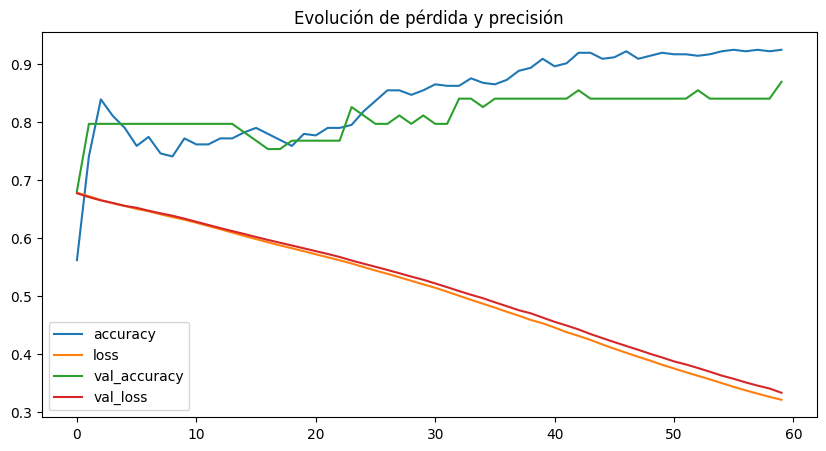

In [12]:
# =====================================
# Resultados del entrenamiento
# =====================================

# Crear un DataFrame con la historia del entrenamiento
loss_acc_metrics_df = pd.DataFrame(history.history)

# Mostrar las primeras filas
print(loss_acc_metrics_df.head())

# Graficar pérdida y precisión
loss_acc_metrics_df.plot(figsize=(10,5), title='Evolución de pérdida y precisión')


In [13]:
# Evaluating a model on unseen data: test set

model_eval = model_1.evaluate(X_test_scaled, y_test)

# Printing the loss and accuracy

print('Test loss: {}\nTest accuracy:{}'.format(model_eval[0],model_eval[1]))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9522 - loss: 0.2894 
Test loss: 0.29576852917671204
Test accuracy:0.9561403393745422


In [14]:
# ‼DON'T DO THIS!! X_test is not scaled. The results will be awful

model_1.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3623 - loss: 277.7508 


[273.20184326171875, 0.37719297409057617]

In [16]:
# Getting the prediction

predictions = model_1.predict(X_test_scaled)
predictions[:15]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


array([[0.6795382 ],
       [0.17512368],
       [0.298391  ],
       [0.7599219 ],
       [0.7946464 ],
       [0.05715812],
       [0.07552883],
       [0.31390464],
       [0.4963379 ],
       [0.7586309 ],
       [0.7682838 ],
       [0.39007398],
       [0.7300373 ],
       [0.48168683],
       [0.704976  ]], dtype=float32)

In [17]:
# Rounding the predictions to 0 and 1

predictions = tf.round(predictions)
 # Display the first 15 preds values

predictions[:15]

<tf.Tensor: shape=(15, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)>

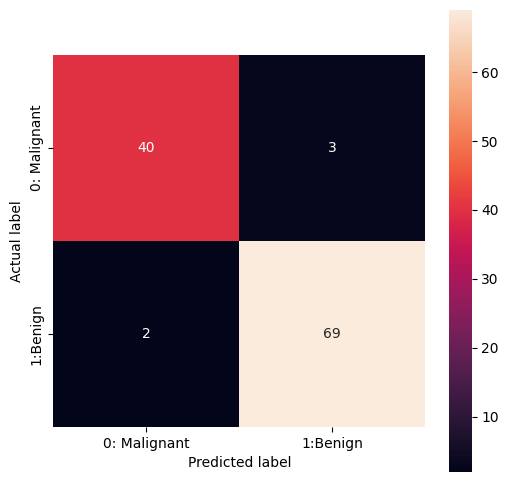

In [18]:
# Getting the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

# Plotting confusion matrix

plt.figure(figsize=(6,6))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0: Malignant', '1:Benign'],
                        yticklabels=['0: Malignant', '1:Benign'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [19]:
# Classification report: F1 score, Recall, Precision

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [20]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(fashion_train, fashion_train_label), (fashion_test, fashion_test_label) = fashion_mnist.load_data()
index = 10

# Get the pixels

fashion_train[index]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  35, 177, 155, 140, 151, 172, 191, 187, 186,
        187, 186, 187, 182, 191, 194, 188, 180, 161, 161, 185,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  59, 170, 153, 141, 120, 154, 160, 161, 172,
        168, 166, 161, 165, 172, 170, 164, 139, 149, 162, 166,  21,   0,
          0,   0],
       [  0,   0,   0,   0,  79, 145, 160, 214, 123, 128, 153, 160, 164,
        158, 157, 154, 155, 170, 165, 141, 195, 193, 152, 166,  61,   0,
          0,   0],
       [  0,   0,   0,   0, 100, 157, 225, 245, 175, 113, 174, 158, 158,
        160, 155, 160, 164, 178, 188, 135, 185, 240, 201, 172, 108,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  31, 174,  28, 126, 153, 166, 152, 158,
        158, 160, 161, 157, 168, 191, 188,  18, 132, 159,   7,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  82, 187, 159, 153, 157,
        158, 162, 164, 164, 154, 187, 190,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   3,   5,   0,  37, 175, 158, 155, 162,
        158, 160, 162, 165, 153, 177, 205,   0,   0,   3,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,  25, 175, 152, 160, 158,
        161, 160, 164, 164, 161, 166, 200,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   4,   0,  30, 171, 147, 164, 155,
        165, 161, 165, 162, 170, 164, 162,   0,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   4,   0,  57, 166, 155, 164, 166,
        161, 161, 164, 167, 165, 165, 162,  28,   0,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   3,   0, 114, 161, 161, 166, 159,
        168, 161, 161, 172, 162, 165, 171,  50,   0,   5,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0, 149, 157, 167, 172, 159,
        172, 164, 161, 172, 170, 160, 171,  89,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   4, 171, 164, 166, 173, 159,
        179, 166, 160, 174, 167, 162, 166, 128,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,  18, 152, 173, 160, 179, 154,
        181, 166, 164, 175, 170, 166, 170, 164,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   4,   0,  47, 165, 172, 167, 185, 153,
        187, 173, 165, 174, 179, 166, 166, 158,   5,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   4,   0,  87, 180, 162, 179, 179, 157,
        191, 182, 165, 168, 190, 173, 165, 166,  20,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   4,   0, 105, 187, 157, 194, 175, 161,
        190, 184, 170, 158, 205, 177, 168, 171,  44,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   5,   0, 138, 181, 158, 205, 160, 167,
        190, 198, 167, 152, 218, 186, 170, 172,  57,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   5,   

This type of fashion is: T-shirt/top(0)


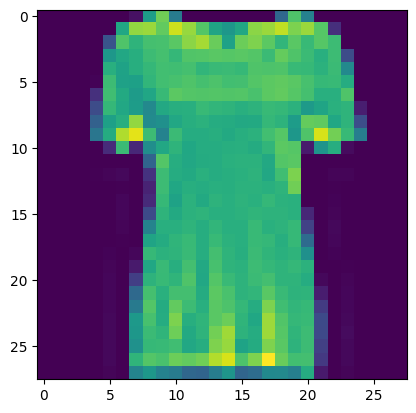

In [21]:
# A list of label names

class_names = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
# Show the image

plt.imshow(fashion_train[index])

# Display the label

image_label = fashion_train_label[index]
print('This type of fashion is: {}({})'.format(class_names[image_label], image_label))


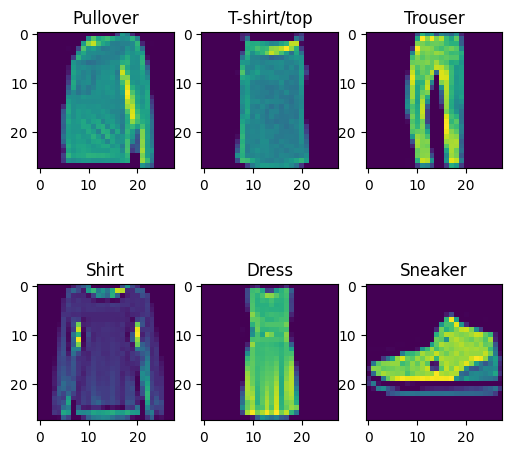

In [22]:
import random

plt.figure(figsize=(6,6))

for index in range(6):

  ax = plt.subplot(2,3, index+1)
  random_index = random.choice(range(len(fashion_train)))
  plt.imshow(fashion_train[random_index])
  plt.title(class_names[fashion_train_label[random_index]])

In [23]:
# Getting the image shape

print('The shape of the whole training dataset:{}'.format(fashion_train[0].shape))
print('The shape of the first(and other)image:{}'.format(fashion_train[0].shape))

The shape of the whole training dataset:(28, 28)
The shape of the first(and other)image:(28, 28)


In [25]:
# Scaling the image pixels to be between 0 and 1

fashion_train = fashion_train/255.0

fashion_test = fashion_test/255.0
# Creating a model

fashion_classifier = tf.keras.models.Sequential([

        # Flattening layer will convert array of pixels into one dimensional column array
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(units=64, activation='relu'),
       tf.keras.layers.Dense(units=32, activation='relu'),
       tf.keras.layers.Dense(units=10, activation='softmax')

])

# Compiling a model: Specifying a loss and optimization function

fashion_classifier.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy']

)
# Training a model
# Allocating 15% of training data to validation set

fashion_classifier.fit(fashion_train, fashion_train_label, epochs=20, validation_split=0.15)

Epoch 1/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5096 - loss: 1.4495 - val_accuracy: 0.7476 - val_loss: 0.7001
Epoch 2/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7570 - loss: 0.6573 - val_accuracy: 0.7778 - val_loss: 0.6036
Epoch 3/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7915 - loss: 0.5853 - val_accuracy: 0.7917 - val_loss: 0.5739
Epoch 4/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7993 - loss: 0.5589 - val_accuracy: 0.7989 - val_loss: 0.5507
Epoch 5/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8109 - loss: 0.5324 - val_accuracy: 0.8119 - val_loss: 0.5221
Epoch 6/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8203 - loss: 0.5042 - val_accuracy: 0.8148 - val_loss: 0.4994
Epoch 7/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8266 - loss: 0.4920 - val_accuracy: 0.8244 - val_loss: 0.4845
Epoch 8/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8328 - loss: 0.4734 - 

KeyboardInterrupt: 

<Axes: >

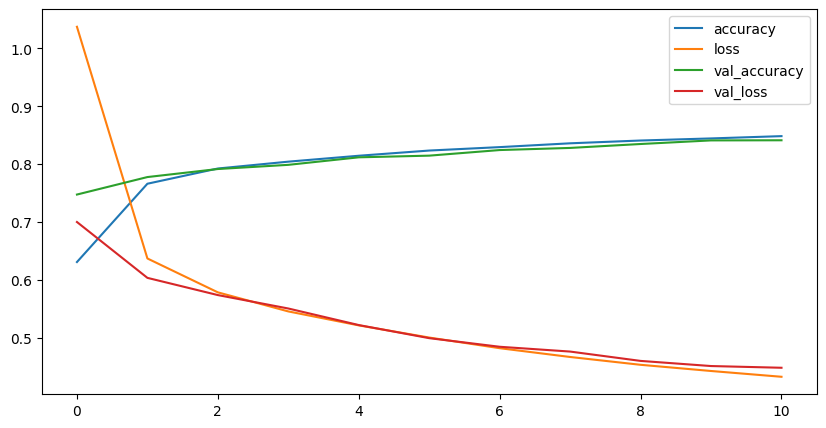

In [26]:
# Getting the dataframe of loss and accuracies on both training and validation

loss_acc_metrics_df = pd.DataFrame(fashion_classifier.history.history)

# Plotting the loss and accuracy

loss_acc_metrics_df.plot(figsize=(10,5))

In [27]:
# Evaluating the model on unseen data

eval = fashion_classifier.evaluate(fashion_test, fashion_test_label)

# Printing the loss and accuracy

print('Test loss: {}\nTest accuracy:{}'.format(eval[0],eval[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8438 - loss: 0.4548
Test loss: 0.4641825258731842
Test accuracy:0.8371000289916992


In [28]:
# Creating a same model as used before

def classifier():

  model = tf.keras.models.Sequential([

        # Flattening layer will convert array of pixels into one dimensional column array
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(units=64, activation='relu'),
       tf.keras.layers.Dense(units=32, activation='relu'),
       tf.keras.layers.Dense(units=10, activation='softmax')

  ])

# Compiling a model: Specifying a loss and optimization function

  model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy']

  )

  return model
  # Defining callbacks

from keras.callbacks import ModelCheckpoint

callbacks = ModelCheckpoint('fashion_classifier.h5', save_best_only=True)
# Controlling training with callbacks

# Get the model

fashion_classifier_2 = classifier()

fashion_classifier_2.fit(fashion_train, fashion_train_label, epochs=20, validation_split=0.15, callbacks=[callbacks])

Epoch 1/20
1577/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4951 - loss: 1.4759

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4966 - loss: 1.4712 - val_accuracy: 0.7382 - val_loss: 0.7074
Epoch 2/20
1581/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7510 - loss: 0.6724

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7511 - loss: 0.6722 - val_accuracy: 0.7718 - val_loss: 0.6195
Epoch 3/20
1576/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7836 - loss: 0.5944

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7836 - loss: 0.5943 - val_accuracy: 0.7918 - val_loss: 0.5646
Epoch 4/20
1578/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8021 - loss: 0.5466

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8021 - loss: 0.5466 - val_accuracy: 0.8034 - val_loss: 0.5399
Epoch 5/20
1572/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8134 - loss: 0.5204

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8134 - loss: 0.5203 - val_accuracy: 0.8124 - val_loss: 0.5125
Epoch 6/20
1572/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8226 - loss: 0.4975

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8227 - loss: 0.4974 - val_accuracy: 0.8231 - val_loss: 0.4898
Epoch 7/20
1577/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8336 - loss: 0.4718

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8336 - loss: 0.4718 - val_accuracy: 0.8254 - val_loss: 0.4824
Epoch 8/20
1592/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8416 - loss: 0.4510

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8416 - loss: 0.4510 - val_accuracy: 0.8350 - val_loss: 0.4618
Epoch 9/20
1588/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8435 - loss: 0.4379

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8435 - loss: 0.4379 - val_accuracy: 0.8386 - val_loss: 0.4498
Epoch 10/20
1585/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8467 - loss: 0.4311

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8467 - loss: 0.4311 - val_accuracy: 0.8372 - val_loss: 0.4435
Epoch 11/20
1590/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8485 - loss: 0.4238

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8485 - loss: 0.4237 - val_accuracy: 0.8430 - val_loss: 0.4369
Epoch 12/20
1590/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8513 - loss: 0.4186

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8513 - loss: 0.4186 - val_accuracy: 0.8433 - val_loss: 0.4314
Epoch 13/20
1591/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8536 - loss: 0.4111

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8536 - loss: 0.4111 - val_accuracy: 0.8497 - val_loss: 0.4201
Epoch 14/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8562 - loss: 0.4041 - val_accuracy: 0.8476 - val_loss: 0.4218
Epoch 15/20
1585/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8593 - loss: 0.3936

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8593 - loss: 0.3936 - val_accuracy: 0.8533 - val_loss: 0.4148
Epoch 16/20
1590/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8600 - loss: 0.3937

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8600 - loss: 0.3937 - val_accuracy: 0.8526 - val_loss: 0.4062
Epoch 17/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8624 - loss: 0.3786 - val_accuracy: 0.8523 - val_loss: 0.4074
Epoch 18/20
1576/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8656 - loss: 0.3802

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8656 - loss: 0.3802 - val_accuracy: 0.8541 - val_loss: 0.4007
Epoch 19/20
1586/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8664 - loss: 0.3703

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8664 - loss: 0.3704 - val_accuracy: 0.8584 - val_loss: 0.3960
Epoch 20/20
1581/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8661 - loss: 0.3690

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8662 - loss: 0.3690 - val_accuracy: 0.8599 - val_loss: 0.3863


In [29]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)
# Stopping training early

# Getting the model

fashion_classifier_2 = classifier()

history = fashion_classifier_2.fit(fashion_train, fashion_train_label, epochs=100, validation_split=0.15, callbacks=[early_stop])

Epoch 1/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4528 - loss: 1.5215 - val_accuracy: 0.7371 - val_loss: 0.7315
Epoch 2/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7409 - loss: 0.6929 - val_accuracy: 0.7716 - val_loss: 0.6235
Epoch 3/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7751 - loss: 0.6119 - val_accuracy: 0.7880 - val_loss: 0.5818
Epoch 4/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7993 - loss: 0.5598 - val_accuracy: 0.8036 - val_loss: 0.5539
Epoch 5/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8093 - loss: 0.5323 - val_accuracy: 0.8139 - val_loss: 0.5309
Epoch 6/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8170 - loss: 0.5138 - val_accuracy: 0.8170 - val_loss: 0.5081
Epoch 7/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8292 - loss: 0.4880 - val_accuracy: 0.8228 - val_loss: 0.4923
Epoch 8/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8310 - loss: 0

KeyboardInterrupt: 